In [2]:
import scipy.io
from pathlib import Path, PureWindowsPath
import os 
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import torch.utils.data

## Data Description  

CWRU is a single point failure dataset that constructed from 3 main faults each fault consist of 3 damage sizes. The total number of fault classes will be 10 classes (i.e. 1 normal class and 9 healthy classes), here is details about the data acquisition : 
- Data is collected at sampling frequency 12,000 samples/second. 
- Each data file lasts for 10 seconds. Thus, it contains 120000 datapoint. 
- Data is collected under 4 different loading conditions (i.e. 0,1,2, and 3 HP)
- Each working condition has 10 classes, and each class has has time series with length 120000 data points 

![alt text](Picture3.png "Title")

### Paths
In this part we load normal data and fault data, whicha has 9 types of faults.  

In [9]:
# paths for 0.07
path_inner_7=Path(r"../data/raw_data\7\inner/")
path_ball_7=Path(r"../data/raw_data\7\ball/")
path_outer_7=Path(r"../data/raw_data\7\outer/")

path_inner_14=Path(r"../data/raw_data\14\inner/")
path_ball_14=Path(r"../data/raw_data\14\ball/")
path_outer_14=Path(r"../data/raw_data\14\outer/")

path_inner_21=Path(r"../data/raw_data\21\inner/")
path_ball_21=Path(r"../data/raw_data\21\ball/")
path_outer_21=Path(r"../data/raw_data\21\outer/")

path_normal=Path(r"../data/raw_data\normal/normal/")


### data visualization 
Here we visualaize the vibrational signals for faulty data with inner faults. There two types of bearing for each class: Drive

(121991, 1)
(121991, 1)


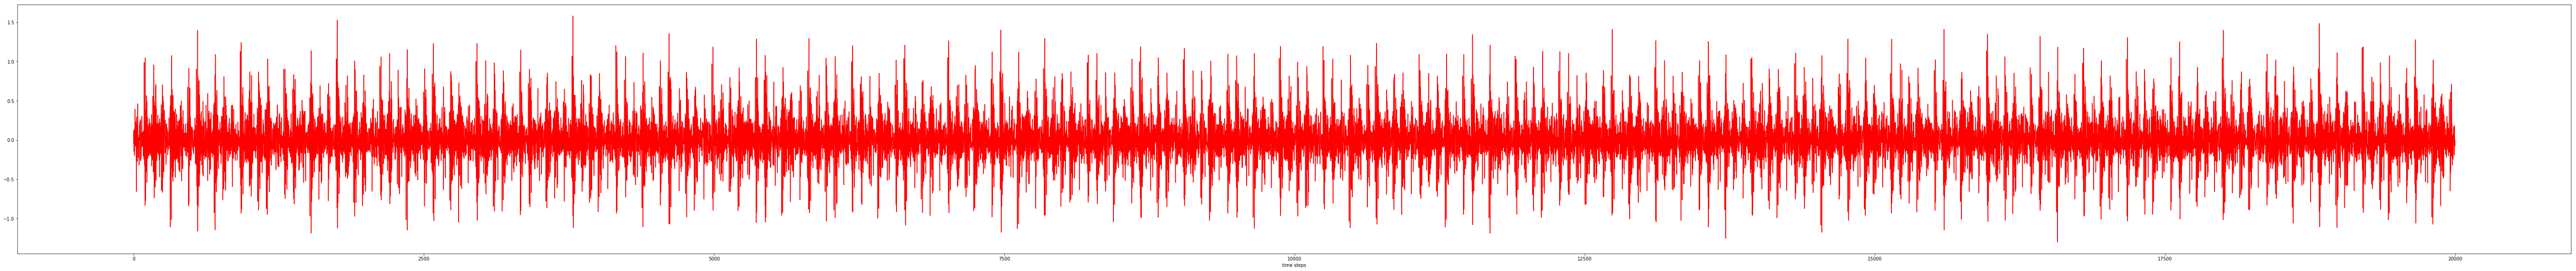

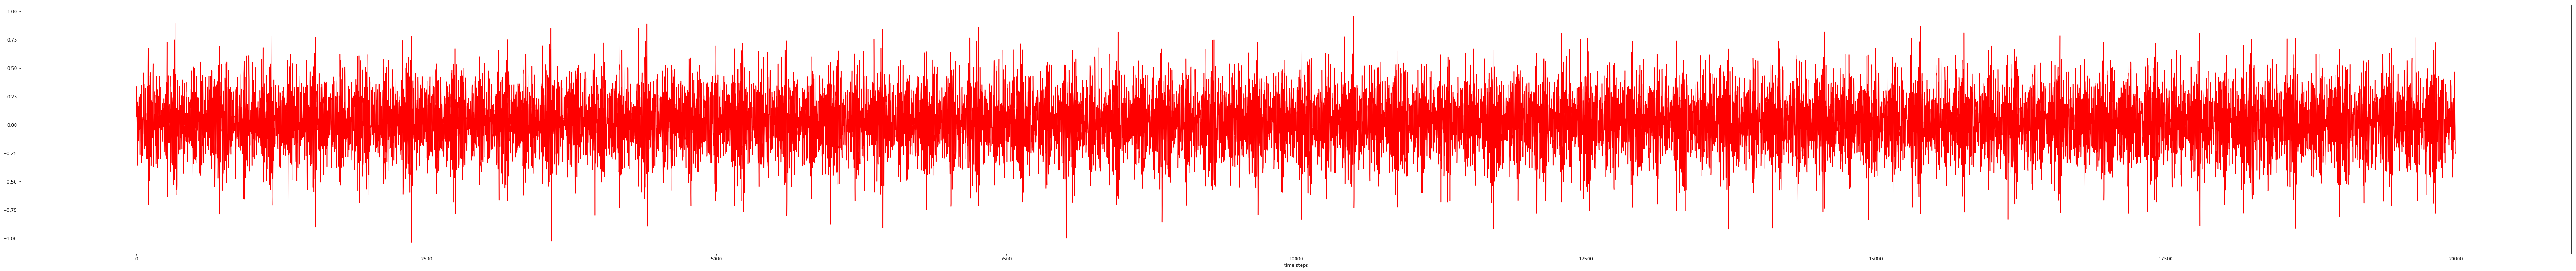

In [18]:
normal_1= scipy.io.loadmat(path_inner_7/'106.mat')
inner_7_0= scipy.io.loadmat(path_inner_7/ "106.mat")
# a=inner_7_0['X106_BA_time']
b=inner_7_0['X106_DE_time']
c=inner_7_0['X106_FE_time']
# print(a.shape)
print(b.shape)
print(c.shape)
# plt.figure(0,figsize=(100,10))        
# plt.plot (a[1:20000],'r')
# plt.xlabel('time steps')
# plt.show()
plt.figure(0,figsize=(100,10))        
plt.plot (b[1:20000],'r')
plt.xlabel('time steps')
plt.show()
plt.figure(0,figsize=(100,10))        
plt.plot (c[1:20000],'r')
plt.xlabel('time steps')
plt.show()

### Data Loading
We read the data files from each correponding class where normal_0 presents the healthy data under working condition 0, while  normal_1,normal_2, and normal_3 are for working conditions 1,2, and 3 respectively. Correspondingly, faulty data with with differnt type faults has same for working conditions. Here we load matlab matrices for each class type, the length of each file is 120000 datapoint ( i.e. 12000 sample/seconds lasts for 10 seconds). 

In [10]:

# Reading normal data
normal_0= scipy.io.loadmat(path_normal/'97.mat')
normal_1= scipy.io.loadmat(path_normal/'98.mat')
normal_2= scipy.io.loadmat(path_normal/'99.mat')
normal_3= scipy.io.loadmat(path_normal/'100.mat')

# extracting drive end acceleartion for normal 
normal_0=normal_0['X097_DE_time']
normal_1=normal_1['X098_DE_time']
normal_2=normal_2['X099_DE_time']
normal_3=normal_3['X100_DE_time']
#============================================================================#
# reading faults with 0.07 diameter
    # inner_7 faults  
inner_7_0= scipy.io.loadmat(path_inner_7/ "105.mat")
inner_7_1= scipy.io.loadmat(path_inner_7/ "106.mat")
inner_7_2= scipy.io.loadmat(path_inner_7/ "107.mat")
inner_7_3= scipy.io.loadmat(path_inner_7/ "108.mat")
# extraqcting drive end acceleartion for normal 
inner_7_0=inner_7_0['X105_DE_time']
inner_7_1=inner_7_1['X106_DE_time']
inner_7_2=inner_7_2['X107_DE_time']
inner_7_3=inner_7_3['X108_DE_time']

    # ball_7 faults
ball_7_0= scipy.io.loadmat(path_ball_7/ "118.mat")
ball_7_1= scipy.io.loadmat(path_ball_7/ "119.mat")
ball_7_2= scipy.io.loadmat(path_ball_7/ "120.mat")
ball_7_3= scipy.io.loadmat(path_ball_7/ "121.mat")
# extracting drive end acceleartion for normal 
ball_7_0=ball_7_0['X118_DE_time']
ball_7_1=ball_7_1['X119_DE_time']
ball_7_2=ball_7_2['X120_DE_time']
ball_7_3=ball_7_3['X121_DE_time']

    # outer_7 faults
outer_7_0= scipy.io.loadmat(path_outer_7/ "130.mat")
outer_7_1= scipy.io.loadmat(path_outer_7/ "131.mat")
outer_7_2= scipy.io.loadmat(path_outer_7/ "132.mat")
outer_7_3= scipy.io.loadmat(path_outer_7/ "133.mat")
# extracting drive end acceleartion for normal 
outer_7_0= outer_7_0['X130_DE_time']
outer_7_1= outer_7_1['X131_DE_time']
outer_7_2= outer_7_2['X132_DE_time']
outer_7_3= outer_7_3['X133_DE_time']
#============================================================================#
# reading faults with 0.14 diameter
    # inner_14 faults  
inner_14_0= scipy.io.loadmat(path_inner_14/ "169.mat")
inner_14_1= scipy.io.loadmat(path_inner_14/ "170.mat")
inner_14_2= scipy.io.loadmat(path_inner_14/ "171.mat")
inner_14_3= scipy.io.loadmat(path_inner_14/ "172.mat")
# extraqcting drive end acceleartion for normal 
inner_14_0=inner_14_0['X169_DE_time']
inner_14_1=inner_14_1['X170_DE_time']
inner_14_2=inner_14_2['X171_DE_time']
inner_14_3=inner_14_3['X172_DE_time']

 # ball_14 faults
ball_14_0= scipy.io.loadmat(path_ball_14/ "185.mat")
ball_14_1= scipy.io.loadmat(path_ball_14/ "186.mat")
ball_14_2= scipy.io.loadmat(path_ball_14/ "187.mat")
ball_14_3= scipy.io.loadmat(path_ball_14/ "188.mat")
# extracting drive end acceleartion for normal 
ball_14_0=ball_14_0['X185_DE_time']
ball_14_1=ball_14_1['X186_DE_time']
ball_14_2=ball_14_2['X187_DE_time']
ball_14_3=ball_14_3['X188_DE_time']

 # outer_14 faults
outer_14_0= scipy.io.loadmat(path_outer_14/ "197.mat")
outer_14_1= scipy.io.loadmat(path_outer_14/ "198.mat")
outer_14_2= scipy.io.loadmat(path_outer_14/ "199.mat")
outer_14_3= scipy.io.loadmat(path_outer_14/ "200.mat")
# extracting drive end acceleartion for normal 
outer_14_0= outer_14_0['X197_DE_time']
outer_14_1= outer_14_1['X198_DE_time']
outer_14_2= outer_14_2['X199_DE_time']
outer_14_3= outer_14_3['X200_DE_time']
#============================================================================#
# reading faults with 0.21 diameter
    # inner_21 faults  
inner_21_0= scipy.io.loadmat(path_inner_21/ "209.mat")
inner_21_1= scipy.io.loadmat(path_inner_21/ "210.mat")
inner_21_2= scipy.io.loadmat(path_inner_21/ "211.mat")
inner_21_3= scipy.io.loadmat(path_inner_21/ "212.mat")
# extracting drive end acceleartion for normal 
inner_21_0=inner_21_0['X209_DE_time']
inner_21_1=inner_21_1['X210_DE_time']
inner_21_2=inner_21_2['X211_DE_time']
inner_21_3=inner_21_3['X212_DE_time']

 # ball_21 faults
ball_21_0= scipy.io.loadmat(path_ball_21/ "222.mat")
ball_21_1= scipy.io.loadmat(path_ball_21/ "223.mat")
ball_21_2= scipy.io.loadmat(path_ball_21/ "224.mat")
ball_21_3= scipy.io.loadmat(path_ball_21/ "225.mat")
# extracting drive end acceleartion for normal 
ball_21_0=ball_21_0['X222_DE_time']
ball_21_1=ball_21_1['X223_DE_time']
ball_21_2=ball_21_2['X224_DE_time']
ball_21_3=ball_21_3['X225_DE_time']

 # outer_21 faults
outer_21_0= scipy.io.loadmat(path_outer_21/ "234.mat")
outer_21_1= scipy.io.loadmat(path_outer_21/ "235.mat")
outer_21_2= scipy.io.loadmat(path_outer_21/ "236.mat")
outer_21_3= scipy.io.loadmat(path_outer_21/ "237.mat")
# extracting drive end acceleartion for normal 
outer_21_0= outer_21_0['X234_DE_time']
outer_21_1= outer_21_1['X235_DE_time']
outer_21_2= outer_21_2['X236_DE_time']
outer_21_3= outer_21_3['X237_DE_time']
#============================================================================#

### Constructing differnt working conditions
Here we concatenate all classes correpsonding to each working condition. Evantaully, we will have 4 working conditions each with dimension 120000 x 10, with 120000 data length and 10 classes. 

In [11]:
# working condition_0 with no load
num_points=120000
work_cond_0 = np.concatenate((normal_0[0:num_points],inner_7_0[0:num_points],
                    ball_7_0[0:num_points],outer_7_0[0:num_points],
                    inner_14_0[0:num_points],ball_14_0[0:num_points],outer_14_0[0:num_points],  
                    inner_21_0[0:num_points],ball_21_0[0:num_points],outer_21_0[0:num_points])
                       ,axis=1)

# working condition_1 with load 1 hp
work_cond_1 = np.concatenate((normal_1[0:num_points],inner_7_1[0:num_points],
                    ball_7_1[0:num_points],outer_7_1[0:num_points],
                    inner_14_1[0:num_points],ball_14_1[0:num_points],outer_14_1[0:num_points],  
                    inner_21_1[0:num_points],ball_21_1[0:num_points],outer_21_1[0:num_points])
                       ,axis=1)

# working condition_2 with load 2 hp
work_cond_2 = np.concatenate((normal_2[0:num_points],inner_7_2[0:num_points],
                    ball_7_2[0:num_points],outer_7_2[0:num_points],
                    inner_14_2[0:num_points],ball_14_2[0:num_points],outer_14_2[0:num_points],  
                    inner_21_2[0:num_points],ball_21_2[0:num_points],outer_21_2[0:num_points])
                       ,axis=1)

# working condition_3 with load 3 hp
work_cond_3 = np.concatenate((normal_3[0:num_points],inner_7_3[0:num_points],
                    ball_7_3[0:num_points],outer_7_3[0:num_points],
                    inner_14_3[0:num_points],ball_14_3[0:num_points],outer_14_3[0:num_points],  
                    inner_21_3[0:num_points],ball_21_3[0:num_points],outer_21_3[0:num_points])
                       ,axis=1)

### Saving working conditions as torch tensor

In [12]:
# differnet working conditions
normal_data = torch.from_numpy(work_cond_0)
work_cond_1=  torch.from_numpy(work_cond_1)
work_cond_2=  torch.from_numpy(work_cond_2)
work_cond_3 = torch.from_numpy(work_cond_3)

## Data Augmentation using Sliding Window
In order to develop sample with suitable size for training the model, sliding window with 4096 length (i.e. sample length): 
- Without window overlapping we will have about _30 samples_ from _each class_ to train the model, which is not enough.
- To have enough training samples we incorporated sliding window with overlapping, _shifting size= 290_. Thus, we got about _400 sample_ for _each class_ and total_4000 sample_ for each _working condition_. The following equations shows how we calcualte overlapping:

\begin{align}
n_{class} & =(\frac{total\_length - sample\_length}{shifting\_size}) \\ 
N_{wk} &= n_{class}* 10 
\end{align}

Where $n_{class}$ is the number of samples per each class and $N_{wk}$ is total number of samples for each working condition. 
![alt text](window.png "Title")

In [13]:
# training data extraction 
i=0
len_data=120000
# total number of samples for all classes 
# num_sample_per_class=num_sample/10
# number with augmented data
num_samples=4030
# number with no overlap data
#num_samples=1000
#sample_len=1200
sample_len=4096

#without overlapping
stride=sample_len

#with overlab
overlab=1
if overlab:
    stride=290
    
# initlize train data and labels
zero_cond=torch.zeros(num_samples,sample_len)
work_cond_a=torch.zeros(num_samples,sample_len)
work_cond_b=torch.zeros(num_samples,sample_len)
work_cond_c=torch.zeros(num_samples,sample_len)
data_labels=torch.LongTensor(num_samples)

for class_select in range(10):
    for count in range(0,len_data-4096,stride):
   # for count in range(0,len_data,stride):
        # select samples of length of 1200
        # we have 
        normal_sample=normal_data[count:count+sample_len,class_select]
        work_a_sample=work_cond_1[count:count+sample_len,class_select]
        work_b_sample=work_cond_2[count:count+sample_len,class_select]
        work_c_sample=work_cond_3[count:count+sample_len,class_select]

        zero_cond[i]= normal_sample
        work_cond_a[i]=work_a_sample
        work_cond_b[i]=work_b_sample
        work_cond_c[i]=work_c_sample
        data_labels[i]=class_select
        i+=1

### Cutting down to 4000 samples

zero_cond=zero_cond[0:4000]
work_cond_a=work_cond_a[0:4000]
work_cond_b=work_cond_b[0:4000]
work_cond_c=work_cond_c[0:4000]
data_labels=data_labels[0:4000]

#### Splitting data into training and testing 

In [133]:
train_size = int(0.5 * len(zero_cond))
test_size = len(zero_cond) - train_size
inx=np.arange(len(zero_cond))
train_dataset, test_dataset = torch.utils.data.random_split(inx, [train_size, test_size])

# 0 working condition
train_data=zero_cond[train_dataset]
train_labels=data_labels[train_dataset]
test_data=zero_cond[test_dataset]
test_labels=data_labels[test_dataset]
# 1hp working condition 
train_a=work_cond_a[train_dataset]
train_a_labels=data_labels[train_dataset]
test_a=work_cond_a[test_dataset]
test_a_labels=data_labels[test_dataset]
#2 hp working condition 
train_b=work_cond_b[train_dataset]
train_b_labels=data_labels[train_dataset]
test_b=work_cond_b[test_dataset]
test_b_labels=data_labels[test_dataset]

#3hp working condition 
train_c=work_cond_c[train_dataset]
train_c_labels=data_labels[train_dataset]
test_c=work_cond_c[test_dataset]
test_c_labels=data_labels[test_dataset]
